In [1]:
import librosa

In [2]:
def load_audio_file(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)  # sr=None preserves the original sample rate
    return audio, sample_rate

In [2]:
import os
import numpy as np
import librosa

def load_audio_file(file_path):
    try:
        y, sr = librosa.load(file_path, sr=22050)
        return y, sr
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None, None

def extract_audio_features(audio, sr):
    if audio is None or sr is None:
        return None

    try:
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
        
        # Compute mean of features to obtain fixed-size vectors
        mfcc_mean = np.mean(mfcc.T, axis=0)
        mel_spectrogram_mean = np.mean(mel_spectrogram.T, axis=0)
        
        # Concatenate all feature vectors into one feature vector
        combined_features = np.concatenate([mfcc_mean, mel_spectrogram_mean])
        
        return combined_features

    except Exception as e:
        print(f"Error processing audio features: {e}")
        return None

def process_audio_files(audio_dir):
    features = []
    processed_files = 0
    total_files = len([f for f in os.listdir(audio_dir) if f.endswith(".mp3")])

    for file_name in os.listdir(audio_dir):
        if file_name.endswith(".mp3"):
            file_path = os.path.join(audio_dir, file_name)
            print(f"Processing file: {file_name}")
            
            # Load and process audio file
            audio, sr = load_audio_file(file_path)
            combined_features = extract_audio_features(audio, sr)
            
            if combined_features is not None:
                features.append(combined_features)
            else:
                print(f"Skipping file due to error: {file_name}")
            
            # Clear memory by deleting audio and combined_features
            del audio, sr, combined_features

            # Update progress
            processed_files += 1
            print(f"Processed {processed_files}/{total_files} files")
    
    features = np.array(features)
    return features

audio_dir = 'audio_files'
features = process_audio_files(audio_dir)

print("Features shape: ", features.shape)


Processing file: audio_444.mp3.mp3
Processed 1/497 files
Processing file: audio_454.mp3.mp3
Processed 2/497 files
Processing file: audio_369.mp3.mp3
Processed 3/497 files
Processing file: audio_211.mp3.mp3
Processed 4/497 files
Processing file: audio_379.mp3.mp3
Processed 5/497 files
Processing file: audio_201.mp3.mp3
Processed 6/497 files
Processing file: audio_177.mp3.mp3
Processed 7/497 files
Processing file: audio_167.mp3.mp3
Processed 8/497 files
Processing file: audio_73.mp3.mp3
Processed 9/497 files
Processing file: audio_63.mp3.mp3
Processed 10/497 files
Processing file: audio_11.mp3.mp3
Processed 11/497 files
Processing file: audio_115.mp3.mp3
Processed 12/497 files
Processing file: audio_105.mp3.mp3
Processed 13/497 files
Processing file: audio_273.mp3.mp3
Processed 14/497 files
Processing file: audio_263.mp3.mp3
Processed 15/497 files
Processing file: audio_426.mp3.mp3
Processed 16/497 files
Processing file: audio_436.mp3.mp3
Processed 17/497 files
Processing file: audio_297

In [3]:
from sklearn.mixture import GaussianMixture
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

labels = [0, 1, 2, ...]  

gmm_model = GaussianMixture(n_components=3, covariance_type='full')
gmm_model.fit(features, labels)

predicted_labels = gmm_model.predict(features)

X_train = np.expand_dims(features, axis=1)

y_train = np.random.randint(0, 3, size=(497,))  

model = Sequential()
model.add(Bidirectional(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False)))
model.add(Dense(3, activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)



Epoch 1/50


/Users/anishajani/myenv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3159 - loss: 1.1518 - val_accuracy: 0.3600 - val_loss: 1.1143
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4525 - loss: 1.0401 - val_accuracy: 0.3000 - val_loss: 1.1502
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5484 - loss: 1.0053 - val_accuracy: 0.3300 - val_loss: 1.1378
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5344 - loss: 0.9796 - val_accuracy: 0.3800 - val_loss: 1.1355
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5726 - loss: 0.9573 - val_accuracy: 0.3200 - val_loss: 1.1551
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5562 - loss: 0.9384 - val_accuracy: 0.3500 - val_loss: 1.1506
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5866 - loss: 0.9090 - val_accuracy: 0.3900 - val_loss: 1.1321
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5986 - loss: 0.9117 - val_accuracy: 0.3600 - val_loss: 1.1531
Ep

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9788 - loss: 0.1351 - val_accuracy: 0.3700 - val_loss: 1.7701
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9575 - loss: 0.1388 - val_accuracy: 0.3500 - val_loss: 1.8472
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9764 - loss: 0.1216 - val_accuracy: 0.4000 - val_loss: 1.8132
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9770 - loss: 0.1177 - val_accuracy: 0.3900 - val_loss: 1.8351
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9688 - loss: 0.1302 - val_accuracy: 0.3800 - val_loss: 1.8236
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9700 - loss: 0.1170 - val_accuracy: 0.3900 - val_loss: 1.7752
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9645 - loss: 0.1252 - val_accuracy: 0.3900 - val_loss: 1.8219
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9578 - loss: 0.1180 - val_accuracy: 0.3900 - val_loss:

Python(39821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(39822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(39823) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Matplotlib is building the font cache; this may take a moment.


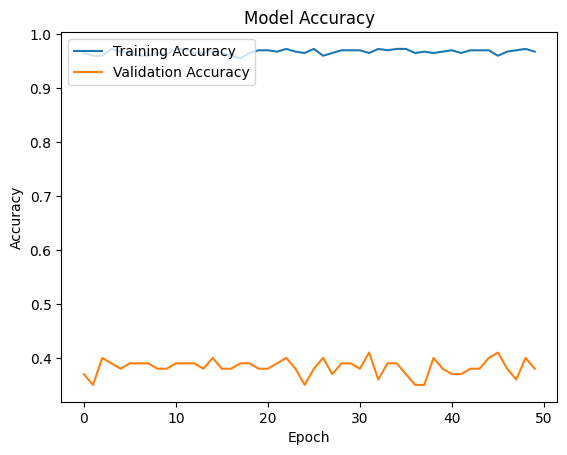

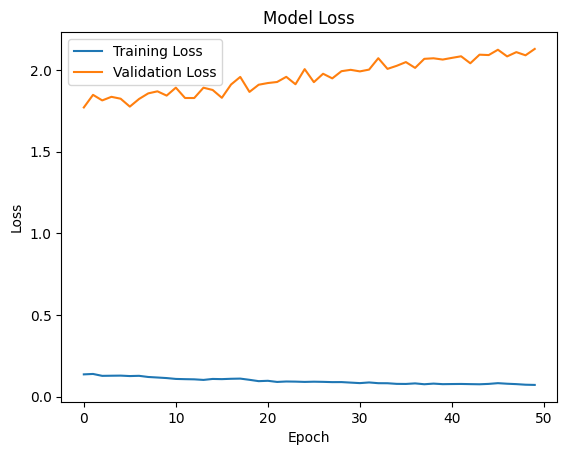

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [4]:
# Predict sentiment for new audio data
predictions = model.predict(X_train)
predicted_classes = np.argmax(predictions, axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [5]:
from sklearn.metrics import classification_report, confusion_matrix

# For GMM or RNN predictions
print(confusion_matrix(y_train, predicted_classes))
print(classification_report(y_train, predicted_classes))


[[142  22  15]
 [ 13 140  10]
 [ 14  21 120]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       179
           1       0.77      0.86      0.81       163
           2       0.83      0.77      0.80       155

    accuracy                           0.81       497
   macro avg       0.81      0.81      0.81       497
weighted avg       0.81      0.81      0.81       497

